In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
#from sidm.tools import llpnanoaodschema_0726 as llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

/tmp/ipykernel_721/2215649911.py:5: DeprecationWarning: NanoEventsFactory.from_root() behavior has changed.
    The default behavior is that now it reads the input root file using
    the newly developed virtual arrays backend of awkward instead of dask.
    The backend choice is controlled by the `mode` argument of the method
    which can be set to "eager", "virtual", or "dask".
    The new default is "virtual" while the `delayed` argument has been removed.
    The old `delayed=True` is now equivalent to `mode="dask"`.
    The old `delayed=False` is now equivalent to `mode="eager"`.
    
  from coffea.nanoevents import NanoAODSchema


In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_8p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=NanoAODSchema,
    #schema=llpnanoaodschema.NanoAODSchema,
    maxchunks=1,
    skipbadfiles=True,
)

channels = [
    "2mu2e",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    #verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

Failed to apply selections to the nested matched muon collections. Error message: no field named 'matched_muons'

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Warning: a histogram with the name muon_numOverlapSegments_matchedDSAMuons could not be filled and will be skipped

Warning: a histogram with the name muon_numOverlapSegments_goodMatchedDSAMuons could not be filled and will be 
skipped

Warning: a histogram with the name dsaMuon_numOverlapSegments_matchedMuons could not be filled and will be skipped

Warning: a histogram with the name dsaMuon_numOverlapSegments_goodMatchedMuons could not be filled and will be 
skipped

Warning: a histogram with the name dsaMuon_lj_dR could not be filled and will be skipped

Warning: a histogram with the name dsaMuon_lj_dR_lowRange could not be filled and will be skipped

Warning: a histogram with the name matched_jet_lepfraction could not be filled and will be skipped

Warning: a histogram with the name mu_matched_jet_lepfraction could not be filled and will be skipped

Warning: a histogram with the name pfmu_matched_jet_lepfraction could not be filled and will be skipped

Warning: a histogram with the name dsamu_matched_jet_lepfraction could not be filled and will be skipped

Warning: a histogram with the name egm_matched_jet_lepfraction could not be filled and will be skipped

Warning: a histogram with the name electron_matched_jet_lepfraction could not be filled and will be skipped

Warning: a histogram with the name photon_matched_jet_lepfraction could not be filled and will be skipped

Warning: a histogram with the name matched_jet_lj_dR could not be filled and will be skipped

Warning: a histogram with the name mu_matched_jet_lj_dR could not be filled and will be skipped

Warning: a histogram with the name pfmu_matched_jet_lj_dR could not be filled and will be skipped

Warning: a histogram with the name dsamu_matched_jet_lj_dR could not be filled and will be skipped

Warning: a histogram with the name egm_matched_jet_lj_dR could not be filled and will be skipped

Warning: a histogram with the name electron_matched_jet_lj_dR could not be filled and will be skipped

Warning: a histogram with the name photon_matched_jet_lj_dR could not be filled and will be skipped

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: divide by zero 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

Signal not in xs cfg, assuming 1fb


In [3]:
out[samples[0]]["cutflow"][channels[0]].print_table()
print()
out[samples[0]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[0]]["cutflow"][channels[0]].print_table(fraction=True)
print()

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                22.4         22.4
PV filter                    59.8         22.4
>=2 LJs                      21.3         11.0
2mu2e                        21.1         10.9

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection               4364.0       4364.0
pass triggers              1633.0       1633.0
PV filter                  4364.0       1633.0
>=2 LJs                    1556.0        804.0
2mu2e                      1538.0        798.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers            37.4          37.4            37.4
PV filter               100.0         100.0            37.4
>=2 LJs                  35.7          4

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe93c7f4bf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

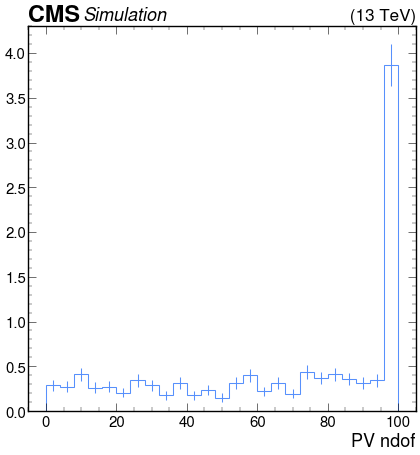

In [4]:
utilities.plot(out[samples[0]]["hists"]["pv_ndof"][channels[0], :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe93d63a9f0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe93d6786b0>, text=[])

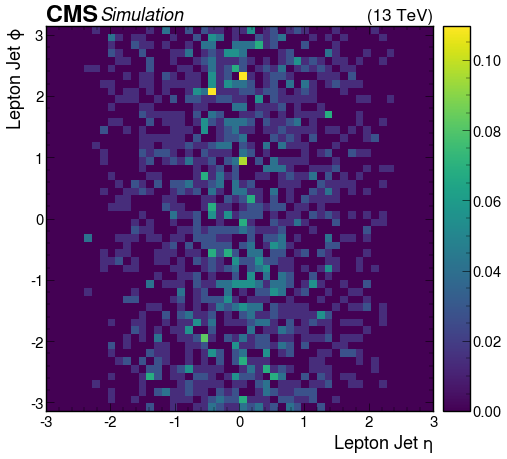

In [5]:
utilities.plot(out[samples[0]]["hists"]["lj_eta_phi"][channels[0], :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe93d0e58b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

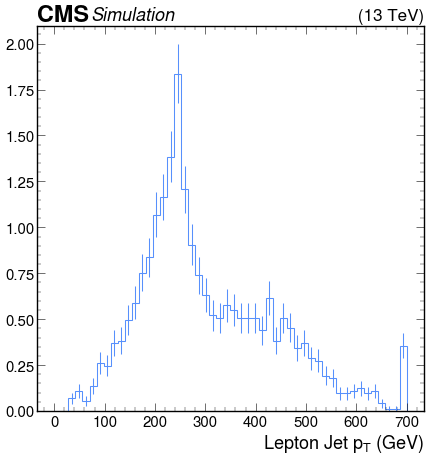

In [6]:
utilities.plot(out[samples[0]]["hists"]["lj_pt"][channels[0], ::2j])

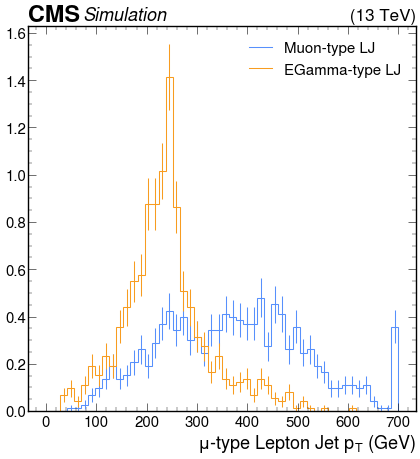

In [7]:
utilities.plot([
    out[samples[0]]["hists"]["mu_lj_pt"]["2mu2e", ::2j],
    out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()


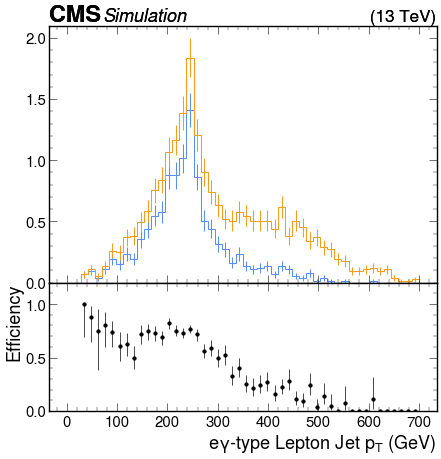

In [8]:
utilities.plot_ratio(
        out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
        out[samples[0]]["hists"]["lj_pt"]["2mu2e", ::2j],
)